## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


In [ ]:
# Instalacion de paquetes necesarios
!pip install urlextract
!pip install URLExtract
!pip install seaborn
!pip install wordcloud
!pip install nltk

In [ ]:
# Importamos las librerias necesarias para nuestro proyecto
# ==============================================================================

# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import pandas     as pd
import numpy      as np
from numpy        import vstack
from pandas       import read_csv

#importamos las librerias necesarias para Gráficos
# ==============================================================================
import seaborn    as sns
import matplotlib.pyplot as plt

# Preprocesado y modelado
# scikit-learn - keras - nlkt
# ==============================================================================
from sklearn.model_selection      import train_test_split
from sklearn.preprocessing        import LabelEncoder
from keras.preprocessing.text     import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras             import Sequential
from tensorflow.keras.layers      import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem                    import WordNetLemmatizer
from nltk                         import download
from sklearn.metrics              import accuracy_score
from urlextract                   import URLExtract
import re
import nltk
from nltk.corpus                  import stopwords
from nltk.tokenize                import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm                  import SVC
from sklearn.metrics              import accuracy_score, confusion_matrix
from sklearn.linear_model         import LogisticRegression


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
# Ignorar todas las advertencias (no se recomienda en la mayoría de los casos)
warnings.filterwarnings('ignore')


Se conecta cuenta google para acceder a drive

In [ ]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Análisis de Datos Exploratorio (EDA)
Lo primero que haremos, será leer los datos de nuestro archivo:

In [ ]:
# Creamos un df con la dirección de nuestro archivo para leerlo
# Agregamos el parámetro encoding='ISO-8859-1' para leer el archivo con esa codificación
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1')

# Mostramos una vista general de nuestro archivo
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Vemos la dimension de nuestro df
df.shape

(1599999, 6)

6 columnas de las cuales:

1 columna Clasificación de sentimiento donde 0 es negativo y 4 positivo

2 columna Identificador único de cada tweet

3 columna Fecha y hora cuando se publico el tweet

4 columna Indica sin hubo una conmsulta realizada al tweet

5 columna Usuario creadaor de tweet

6 columna Texto del tweet

Asignamos nombre a las columnas del df para facilitar el manejo de los datos. Asociados a su significado.

In [ ]:
# Asignamos nombres a las columnas para facilitar su manejo
df.columns = ['sentimiento', 'id', 'fecha', 'consulta', 'usuario', 'texto']

In [ ]:
# Mostramos una vista general de nuestro archivo con los nombres de las columnas agregadas
df.head()

,sentimiento,id,fecha,consulta,usuario,texto
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Resumen estadistico
df.describe()

,sentimiento,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
# Seleccionamos solamente las columnas necesarias
df = df[['sentimiento', 'texto']]

# Mostramos nuestras columnas que dejamos y sus valores
df.head()

,sentimiento,texto
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
# Vemos informacion de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sentimiento  1599999 non-null  int64 
 1   texto        1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
# muestra la cantidad de valores nulos en cada columna
df.isnull().sum()

sentimiento    0
texto          0
dtype: int64

In [ ]:
# obtenemos el número de valores únicos en cada columna
df.nunique()

sentimiento          2
texto          1581465
dtype: int64

In [ ]:
# Vemos los 2 valores de la columna sentiment
df['sentimiento'].unique()


array([0, 4])

Cambiamos el sentimiento de valor 4 a valor 1. El 0 queda igual.

In [ ]:
# Reemplazo el valor 4 x 1 en la columna sentimiento
df['sentimiento'].replace(4, 1, inplace=True)
print(df['sentimiento'].unique())

[0 1]


Completitud del archivo

In [ ]:
# Revisamos la completitud de nuestro df
print(f"Porcentaje de completitud del df:{df.count().sum() / df.size * 100:.2f} %")

Porcentaje de completitud del df:100.00 %


Duplicado de archivo

In [ ]:
# Encontrar las filas duplicadas
cantidad_filas_duplicadas = df.duplicated().sum()

colum_dupli = df.columns[df.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")

No hay columnas duplicadas en nuestro dataframe


Eliminación de datos Nulos

In [ ]:
# Eliminamos los registros que tengan por lo menos un valor NaN o nulo en una columna
df = df.dropna()
# Vemos informacion de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sentimiento  1599999 non-null  int64 
 1   texto        1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


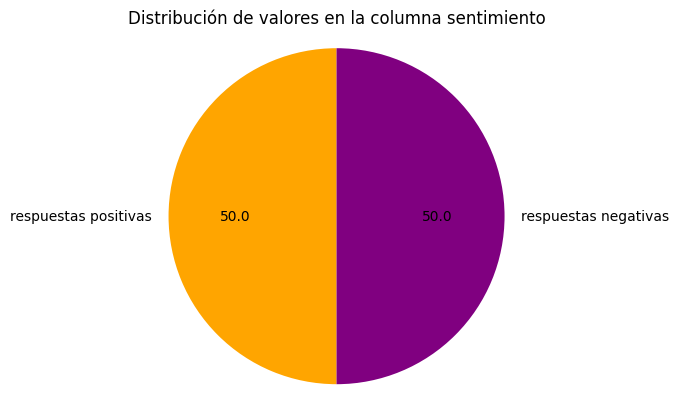

In [ ]:
# Reviso la distribución de respuestas de nuestro archivo en un gráfico de torta
import matplotlib.pyplot as plt
# Obtengo las frecuencias de cada valor en la columna "sentimiento"
frecuencias = df["sentimiento"].value_counts()
# Extraigo las etiquetas (valores únicos) y las frecuencias correspondientes
labels = frecuencias.index
values = frecuencias.values
# Convierto las etiquetas a un formato más descriptivo para la visualización
labels = ["respuestas negativas" if label == 0 else "respuestas positivas" for label in labels]

# Definimos los colores que queremos usar
colors = ['orange', 'purple']
# Creo un gráfico de pastel con las frecuencias, etiquetas, colores.
plt.pie(values, labels=labels , autopct="%1.1f", startangle=90, colors=colors)
# Configuro el aspecto del gráfico para que sea un círculo y no una elipse
plt.axis("equal")
plt.title("Distribución de valores en la columna sentimiento")
plt.show()


In [ ]:
# Se conservan sólo los elementos a utilizar para el analisis
# Ocuparemos solo 2 columnas del archivo
df = df[["sentimiento", "texto"]].copy()

In [ ]:
df.head()

,sentimiento,texto
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
# para reemplazar un dato erroreno
#df["sentiment"] = df["sentiment"].replace({"valor error":1, "0":0})

Opción 1: reducir nuestra data a un porcentaje del archivo de manera aleatoria.

In [ ]:
# Para reducir los recursos computacionales al trabajar con el archivo completo
# Se considera sólo una muestra del 10% por recursos computacionales.

sample_size = int(len(df) * 0.1)
df = df.sample(n=sample_size, random_state=42)

# SE APLICO 3 VECES PARA DEJAR NUESTRA DATA EN 1599 DATOS

Opción 2: Reducir nuestra data a una cantidad dada de datos iniciales y finales

In [ ]:
# Supongamos que 'columna_especifica' es la columna por la que quieres ordenar
columna_especifica = 'sentimiento'

# Ordenamos el DataFrame basado en 'columna_especifica'
df_ordenado = df.sort_values(by=columna_especifica)

# Seleccionamos las primeras 500 filas y las últimas 500 filas
primeras_500 = df_ordenado.head(500)
ultimas_500 = df_ordenado.tail(500)

# Concatenamos las dos selecciones para obtener un DataFrame de 1000 filas
df = pd.concat([primeras_500, ultimas_500])

# Mostramos el DataFrame final
print(df)


In [ ]:
# Quedamos con la opción 1 donde se toman datos ramdon en proporcion de nuestra data

In [ ]:
# Vemos la información de como quedo nuestro archivo reducido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1390219 to 1497477
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimiento  1599 non-null   int64 
 1   texto        1599 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [ ]:
# Quedamos con una data 1599 del archivo original

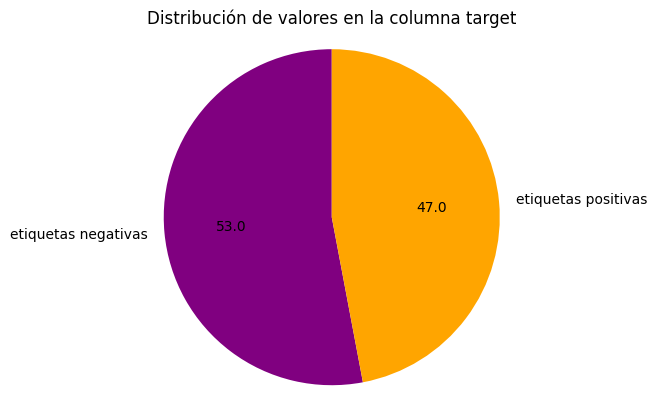

In [ ]:
# Reviso la proporción de la data reducida
import matplotlib.pyplot as plt
# Obtengo las frecuencias de cada valor en la columna "sentimiento"
frecuencias = df["sentimiento"].value_counts()
# Extraigo las etiquetas (valores únicos) y las frecuencias correspondientes
labels = frecuencias.index
values = frecuencias.values
# Convierto las etiquetas a un formato más descriptivo para la visualización
labels = ["etiquetas negativas" if label == 0 else "etiquetas positivas" for label in labels]

# Definimos los colores que queremos usar
colors = ['purple', 'orange']
# Creo un gráfico de pastel con las frecuencias, etiquetas, colores.
plt.pie(values, labels=labels , autopct="%1.1f", startangle=90, colors=colors)
# Configuro el aspecto del gráfico para que sea un círculo y no una elipse
plt.axis("equal")
# Agrego un título al gráfico
plt.title("Distribución de valores en la columna Sentimiento")
# Muestro el gráfico
plt.show()


Nuestra data ya reducida random se obtiene tambien una buena toma, que da 47/53 un poco sesgada a los target negativos, para tenerlo encuenta en nuestros resultados.

Procesamiento de texto

In [ ]:
# Función para eliminar URL y "@" (menciones)
def eliminar_urls(texto):
    # Creamos un extractor de URLs
    extractor = URLExtract()
    # Buscamos todas las URLs en el texto
    urls = extractor.find_urls(texto)
    # Para cada URL encontrada en el texto
    for url in urls:
        # Reemplazamos la URL por un espacio en blanco
        texto = texto.replace(url, " ")

    # Eliminamos las menciones (palabras que comienzan con "@")
    texto = re.sub(r"@\w+", "", texto)
    # Devolvemos el texto sin URLs ni menciones, y eliminamos espacios en blanco al principio y al final
    return texto.strip()


In [ ]:
# Descargar paquete para palabras de parada
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Limpieza de datos:
1.   Eliminación de URLS y menciones
2.   Normalizacion texto a minuscula
3.   Elinación de signos de puntuación
4.   Eliminacion palabras no alfanumericas
5.   Eliminacion palabras paradas




In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  # Importamos la función word_tokenize

# Aplicar la función para eliminar las URLS y menciones
df['texto'] = df['texto'].apply(eliminar_urls)
# Convertir el texto en minusculas (normalizado)
df['texto'] = df['texto'].apply(lambda x: x.lower())
# Tokenizar el texto en palabras y eliminar signos de puntuacion
df['texto'] = df['texto'].apply(lambda x: word_tokenize(x))
# Eliminamos palabras que no son alfanumericas
df['texto'] = df['texto'].apply(lambda x:[word for word in x if word.isalpha()])

# Crear un conjunto de palabras de parada
stop_words = set(stopwords.words('english'))
# Eliminamos palabras paradas
df['texto'] = df['texto'].apply(lambda x: [word for word in x if word not in stop_words])
# Unimos las palabras en un texto ya eliminado las palabras paradas
df['texto'] = df['texto'].apply(lambda x: " ".join(x))


In [ ]:
# Vemos como quedaron nuestras columnas tras realizar limpieza de datos.
df.head(5)

,sentimiento,texto
1390219,1,celtic mannor thursday gon na bloody amazing l...
1481358,1,work till hope great day
1496940,1,titanic tnt loves
63962,0,woke bout go barnes noble tanning bed ps hell ...
314264,0,good morning twitter looks like work today


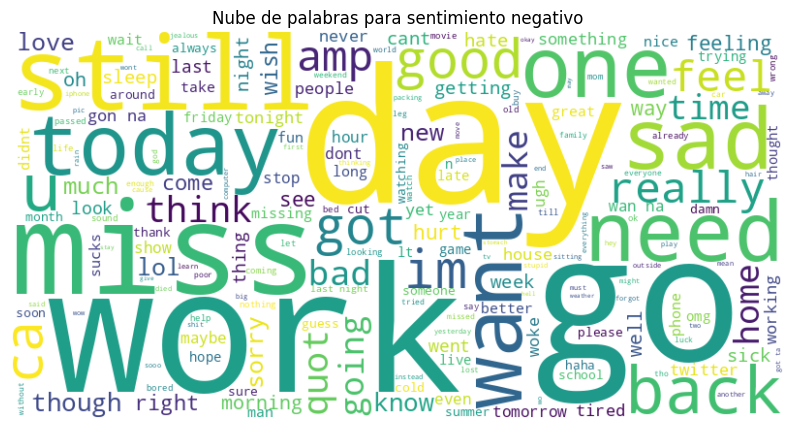

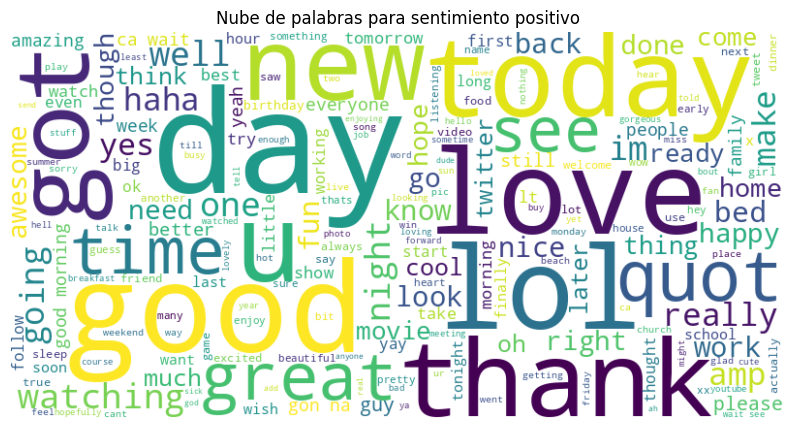

In [ ]:
# Importamos la nube de letras
from wordcloud import WordCloud

# Agrupamos los tweets por la columna target en grupos (0 y 1)
grupo_sentimiento = df.groupby("sentimiento")
# Obtenemos los textos con sentimiento negativo
negativo_tweets = grupo_sentimiento.get_group(0)["texto"]
# Obtenemos los textos con sentimiento positivo
positivo_tweets = grupo_sentimiento.get_group(1)["texto"]

# Creamos una nube de palabras para el grupo negativo
wordcloud_negativo = WordCloud(
    # Ancho de la nube de palabras en píxeles
    width=800,
    # Altura de la nube de palabras en píxeles
    height=400,
    # Color de fondo de la nube de palabras
    background_color = "white",
    # Color de las palabras
    colormap="viridis"
).generate(" ".join(negativo_tweets))

# Mostramos la nube de palabras para el grupo negativo
# Dimensión de tamaño
plt.figure(figsize=(10, 6))
# Muestra la imagen generada
plt.imshow(wordcloud_negativo, interpolation="bilinear")
# Desactiva los ejes del gráfico
plt.axis("off")
# Titulo de nube de palabras
plt.title("Nube de palabras para sentimiento negativo")
print("    ")
# Mostramos la nube de letras
plt.show()

print("    ")

# Creamos una nube de palabras para el grupo positivo
wordcloud_positivo = WordCloud(
    width=800,
    height=400,
    background_color = "white",
    colormap="viridis"
).generate(" ".join(positivo_tweets))

# Mostramos la nube de palabras para el grupo positivo
# Dimensión de tamaño
plt.figure(figsize=(10, 6))
# Muestra la imagen generada
plt.imshow(wordcloud_positivo, interpolation="bilinear")
# Desactiva los ejes del gráfico
plt.axis("off")
# Titulo de nube de palabras
plt.title("Nube de palabras para sentimiento positivo")
print("    ")
# Mostramos la nube de letras
plt.show()


Vemos en los 2 graficos palabras que se mostraron con mayor veces en el analisis, ojo que es un extracto de la data set real se bajo la toma de valores bastante para poder ejecutar el código. Tambien se ve que hay palabras que aparecen en ambos lados, posiblemente se emplean en distintos contextos.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


Division de datos para nuestro modelo a ocupar

In [ ]:
# Conjunto de datos
 # Convertimos la columna "text" a tipo string y la asignamos a X
X = df["texto"].astype(str)
 # Asignamos la columna "sentimiento" a y
y = df["sentimiento"]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df['sentimiento'], test_size=0.2, random_state=42)
# Nuestro X_test queda con el 20% y X_train con 80% de los datos

In [ ]:
# Dimension y datos de X_train
X_train.shape

(1279,)

In [ ]:
# # Dimension y datos de X_test
X_test.shape

(320,)

Vectorización de texto: Aquí es donde convertirías los tweets en vectores numericos al usar TF-IDF donde a mayor sea la frecuencia del término en el documento, mayor será su importancia.

In [ ]:
# Modelo de vectorización y ajuste a entrenamiento

# Creamos un objeto de la clase TfidfVectorizer
tfidfvec = TfidfVectorizer()
# Ajustamos el vectorizador a los datos de entrenamiento y transformamos el texto en vectores
X_train_tfidf = tfidfvec.fit_transform(X_train)


Nota: como la naturaleza del problema es de clasificación binaria 0 y 1, ocuparemos SVM (algoritmo de aprendizaje supervisado) con una regresion lineal es lo más adecuado.

In [ ]:
# Aplicar modelo SVM (algoritmo de aprendizaje supervisado)
# Creamos un modelo SVM con una regresión lineal
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
# Entrenamos el modelo creado con 80% de los datos
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Transformamos los datos de prueba con el mismo vectorizador que usamos para los datos de entrenamiento
X_test_tfidf = tfidfvec.transform(X_test)

# Usamos el modelo SVM para predecir los sentimientos de los tweets en los datos de prueba
y_pred = svm_model.predict(X_test_tfidf)


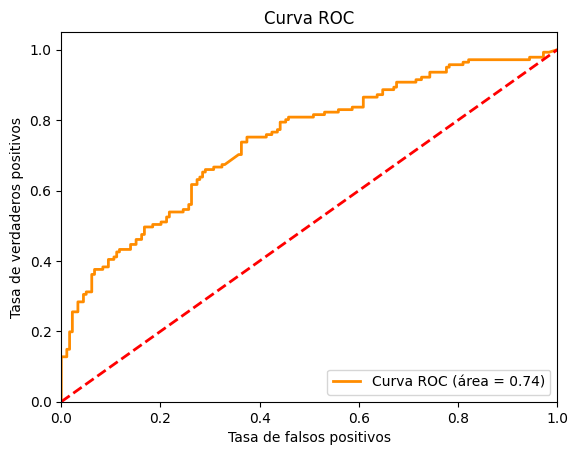

In [ ]:
# Importamos las funciones para calcular la curva ROC y el área bajo la curva
from sklearn.metrics import roc_curve, auc

# Obtenemos las puntuaciones de decisión del modelo SVM para los datos de prueba
y_scores = svm_model.decision_function(X_test_tfidf)

# Calculamos la tasa de falsos positivos y la tasa de verdaderos positivos para diferentes umbrales
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculamos el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Creamos una figura para mostrar la curva ROC
plt.figure()

# Dibujamos la curva ROC
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Curva ROC (área = %0.2f)" % roc_auc)

# Dibujamos la línea diagonal que representa una clasificación aleatoria
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")

# Configuramos los límites de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Configuramos las etiquetas de los ejes
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")

# Configuramos el título del gráfico
plt.title("Curva ROC")

# Mostramos la leyenda
plt.legend(loc="lower right")

# Mostramos el gráfico
plt.show()


La curva de ROC, mide la capacidad del modelo para discriminar entre clases. Mide la tasa de verdaderos positivos frente a la tasa de falsos positivos a diferentes niveles de umbral.

Un valor de 0.74 indica que el modelo tiene una buena capacidad para distinguir entre clases.

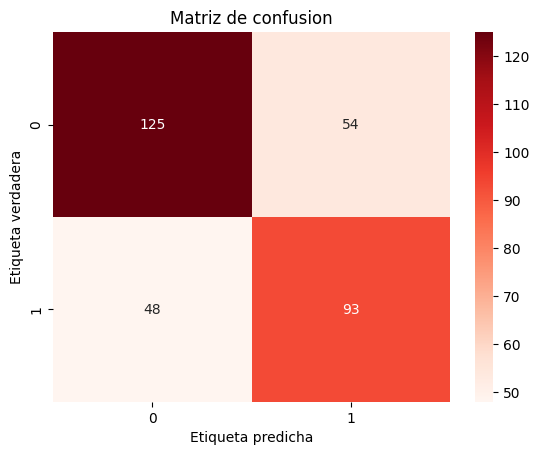

 
-----------------------------------
Precisión del módelo:  0.68125


In [ ]:
# Importamos la biblioteca seaborn para la visualización de datos
import seaborn as sns

# Calculamos la matriz de confusión entre las etiquetas verdaderas y las predichas
conf_matrix = confusion_matrix(y_test, y_pred)

# Creamos un mapa de calor para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")

# Configuramos el título del gráfico
plt.title("Matriz de confusion")

# Configuramos las etiquetas de los ejes
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")

# Mostramos el gráfico
plt.show()

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimimos la precisión del modelo
print(" ")
print("-----------------------------------" )
print("Precisión del módelo: ", accuracy )



La precisión que nos da nuestro modelo sería 0.68125, lo que indica que el 68% de las predicciones son correctas. Teniendo encuenta que nuestros datos están sesgados 6% cargado a etiquetas negativas.




In [ ]:
# Prueba del modelo con una nueva frase

nueva_frase = "When help is needed, sometimes it is late"
# Conv a minusculas
nueva_frase_preprocesada = nueva_frase.lower()
#Vectorización con TFID
nueva_frase_vectorizada = tfidfvec.transform([nueva_frase_preprocesada])
# Prediccion con el modelo SVC
prediccion = svm_model.predict(nueva_frase_vectorizada)


print("La prediccion para la farase '{}' es: {}".format(nueva_frase, prediccion))


La prediccion para la farase 'When help is needed, sometimes it is late' es: [0]


La clasificó como NEGATIVA

In [ ]:
# Prueba del modelo con una nueva frase

nueva_frase = "I believe that every person needs help in this world, sometimes what you least imagine"

# Conv a minusculas
nueva_frase_preprocesada = nueva_frase.lower()
#Vectorización con TFID
nueva_frase_vectorizada = tfidfvec.transform([nueva_frase_preprocesada])
# Prediccion con el modelo SVC
prediccion = svm_model.predict(nueva_frase_vectorizada)


print("La prediccion para la farase '{}' es: {}".format(nueva_frase, prediccion))



La prediccion para la farase 'I believe that every person needs help in this world, sometimes what you least imagine' es: [1]


La clasificó como POSITIVA

Prueba con modelo Random Forest classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Conjunto de datos

# Crear el vectorizador TF-IDF
tfidfvec = TfidfVectorizer()

# Separamos datos X y datos Y para nuestro modelo a ocupar
X = tfidfvec.fit_transform(df["texto"])
y = df["sentimiento"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Supongamos que X e y son tus características y etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear un modelo de bosques aleatorios con 100 árboles y semilla aleatoria para reproducibilidad 42
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)


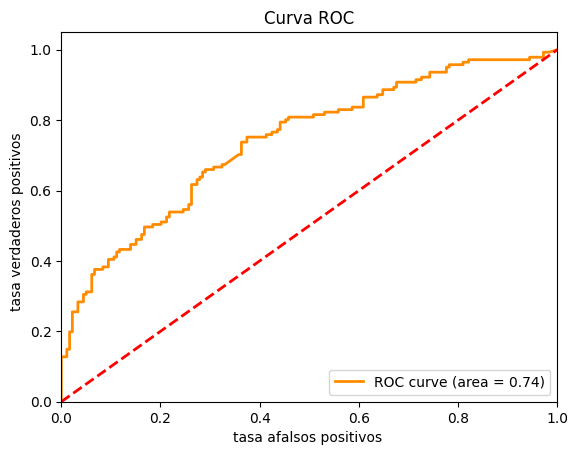

In [ ]:
# Obtener las puntuaciones de decisión del modelo SVM en el conjunto de prueba TF-IDF
y_scores = svm_model.decision_function(X_test_tfidf)
# Calcular la tasa de falsos positivos y la tasa de verdaderos positivos
fpr, tpr, _ = roc_curve(y_test, y_scores)
# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)
# Crear una figura para visualizar la curva ROC
plt.figure()
# Graficar la curva ROC con el área bajo la curva (AUC) en la etiqueta
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
# Creamos la línea punteada diagonal que representa el rendimiento aleatorio
plt.plot([0, 1], [0, 1], color="Red", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Mostramos los nombres de los ejes
plt.xlabel("tasa afalsos positivos ")
plt.ylabel("tasa verdaderos positivos  ")
# Mostrar el titulo del gráfico
plt.title("Curva ROC")
# Mostrar la leyenda
plt.legend(loc="lower right")
# Mostrar el gráfico
plt.show()



La curva de ROC, mide la capacidad del modelo para discriminar entre clases. Mide la tasa de verdaderos positivos frente a la tasa de falsos positivos a diferentes niveles de umbral.

Un valor de 0.74 indica que el modelo tiene una buena capacidad para distinguir entre clases.

Entrenamiento del modelo: Aquí es donde entrenarías tu modelo de clasificación. Podrías usar cualquier modelo de tu elección, pero aquí hay un ejemplo de cómo podrías hacerlo con una regresión logística:

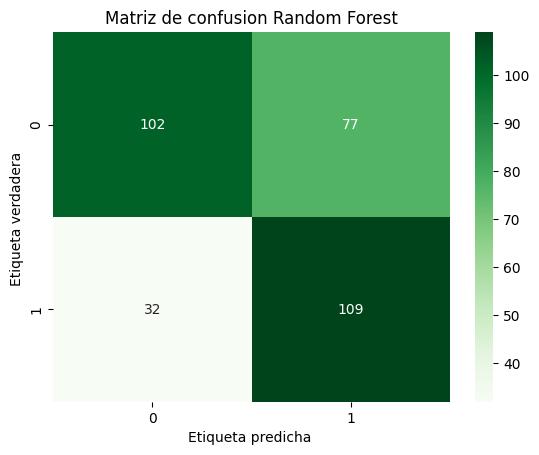

 
-----------------------------------
Precisión del módelo:  0.659375


In [ ]:
# Matriz de confusion y precision del modelo random forest clasifier

import seaborn as sns
# Calcular la matriz de confusión entre las etiquetas verdaderas y predichas
conf_matrix = confusion_matrix(y_test, y_pred)
# Crear un mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
# Mostramos nombre de titulo
plt.title("Matriz de confusion Random Forest")
# Mostramos nombre de ejes
plt.xlabel("Etiqueta predicha ")
plt.ylabel("Etiqueta verdadera ")
# Mostramos la matriz
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(" ")
print("-----------------------------------" )
print("Precisión del módelo: ", accuracy )




La precisión que nos da nuestro modelo sería 0.659375, lo que indica que el 65% de las predicciones son correctas. Teniendo encuenta que nuestros datos están sesgados 6% cargado a etiquetas negativas.


In [ ]:
# Prueba del modelo con una nueva frase

nueva_frase = "When help is needed, sometimes it is late"
# Conv a minusculas
nueva_frase_preprocesada = nueva_frase.lower()
#Vectorización con TFID
nueva_frase_vectorizada = tfidfvec.transform([nueva_frase_preprocesada])
# Prediccion con el modelo SVC
prediccion = rf_model.predict(nueva_frase_vectorizada)


print("La prediccion para la farase '{}' es: {}".format(nueva_frase, prediccion))

La prediccion para la farase 'When help is needed, sometimes it is late' es: [1]


La clasificó como POSITIVA

In [ ]:
# Prueba del modelo con una nueva frase

nueva_frase = "I believe that every person needs help in this world, sometimes what you least imagine"

# Conv a minusculas
nueva_frase_preprocesada = nueva_frase.lower()
#Vectorización con TFID
nueva_frase_vectorizada = tfidfvec.transform([nueva_frase_preprocesada])
# Prediccion con el modelo SVC
prediccion = rf_model.predict(nueva_frase_vectorizada)


print("La prediccion para la farase '{}' es: {}".format(nueva_frase, prediccion))



La prediccion para la farase 'I believe that every person needs help in this world, sometimes what you least imagine' es: [1]


La clasificó como POSITIVA